# Verification of 1D diffusion

In 1D, the Cleary and Adrian (1973) solution for the diffusion problem is the following:

$$\begin{align}
C(x,t) = C_i 
+ (C_0 - C_i) A(x,t)
\end{align}$$

$$
\begin{aligned}
A(x,t) ={}& 
\frac{1}{2}\,
\operatorname{erfc}\!\left(
    \frac{R x - v t}{2\sqrt{D R t}}
\right)
+ \frac{1}{2}\,
\exp\!\left(\frac{v x}{D}\right)
\operatorname{erfc}\!\left(
    \frac{R x + v t}{2\sqrt{D R t}}
\right)
\\[6pt]
&+ 
\frac{1}{2}
\left[
    2 
    + \frac{v(2L - x)}{D}
    + \frac{v^{2} t}{D R}
\right]
\exp\!\left(\frac{v L}{D}\right)
\operatorname{erfc}\!\left(
    \frac{R(2L - x) + v t}{2\sqrt{D R t}}
\right)
\\[6pt]
&\quad
- \left(\frac{v^{2} t}{\pi D R}\right)^{1/2}
\exp\!\left[
    \frac{v L}{D}
    - \frac{R}{4 D t}\,(2L - x + \tfrac{v t}{R})^{2}
\right]
\end{aligned}
$$

Where: <br>
$C_i=$ Homogeneous initial concentration <br>
$C_0=$ Boundary concentration <br>
$x=$ Position <br>
$v=$ gas seepage <br>
$D=$ Diffusion coefficient <br>
$t=$ Time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from frake import GraphFunctions as gf
from scipy.special import erfc
import seaborn as sns

In [2]:
# function for Cleary and Adrian analytical solution for 1D diffusion with constant concentration boundary condition
def cleary_adrian_1D(x, t, D, C0, L, C_i=0):
    """
    Calculate the Cleary and Adrian analytical solution for 1D diffusion with constant concentration boundary condition.

    Parameters:
    x : float or np.ndarray
        Position(s) at which to evaluate the concentration (m).
    t : float
        Time at which to evaluate the concentration (s).
    D : float
        Diffusion coefficient (m^2/s).
    C0 : float
        Constant concentration at the boundary (kg/m^3).
    L : float
        Length of the domain (m).
    Returns:
    C : float or np.ndarray
        Concentration at position(s) x and time t (kg/m^3).
    """  
    A= erfc(x / (2 * np.sqrt(D * t))) + erfc((2*L-x)/(2 * np.sqrt(D * t)))    
    C = C_i + (C0 - C_i) * A
    return C

In [3]:
# Define x points
x_points = np.linspace(0, 1, 100)  # from 0 to 1 m

#final time simulated
t_final = 7200  # seconds
# Diffusion coefficient
D = 6.11e-5   # m^2/s
# Boundary concentration
C0 = 40  # mol/m^3
# Initial concentration
C_i = 32  # mol/m^3

# snapshot times to evaluate
snapshot_times = np.linspace(0, t_final, 24)  # from 0s to 7200s

# Calculate analytical solution at snapshot times
analytical_solutions = {}
for t in snapshot_times:
    analytical_solutions[t] = cleary_adrian_1D(x_points, t, D, C0, 1, C_i)
    #subtract difference from boundary when different
    if analytical_solutions[t][0] != C0:
        # adjust the correctio linearly, being max at top and half at bottom
        analytical_solutions[t] = analytical_solutions[t] - (analytical_solutions[t][0] - C0) * (1 - 0.5 * x_points)

# Save data in DataFrame for easier col 1: x_points col 2- : concentrations at different times
data = {'Position (m)': x_points}
OB_DATA=[]
for t in snapshot_times:
    data['C'] = analytical_solutions[t]
    if t == 0: #fill with initial condition
        data['C'] = np.full_like(x_points, C_i)
    df = pd.DataFrame(data)
    OB_DATA.append(df)

C:\Users\zamcr\AppData\Local\Temp\ipykernel_29228\770904217.py:21: RuntimeWarning: divide by zero encountered in divide
  A= erfc(x / (2 * np.sqrt(D * t))) + erfc((2*L-x)/(2 * np.sqrt(D * t)))
C:\Users\zamcr\AppData\Local\Temp\ipykernel_29228\770904217.py:21: RuntimeWarning: invalid value encountered in divide
  A= erfc(x / (2 * np.sqrt(D * t))) + erfc((2*L-x)/(2 * np.sqrt(D * t)))


In [4]:
# load csv data from Paraview
from frake import FileFunctions as ff
from frake import ModifierFunctioins as mf
import os

In [5]:


#get relative path this file path
myPath = os.getcwd() 
print(myPath)

#get a a folder above a path
path_above= os.path.dirname(myPath)
print(path_above)

#complete path to data folder
myPath = os.path.join(path_above, 'output')
print(myPath)


ADSIM_DATA, IDs, _= ff.OpenFromFolder(Path=myPath, filetype='csv')

mf.DataOperation(ADSIM_DATA, '-', 'arc_length', 1, 'arc_length')
mf.DataOperation(ADSIM_DATA, '*', 'arc_length', -1, 'arc_length')

ADSIM_DATA[0].head()

c:\Users\zamcr\OneDrive\Documents\GitHub\ADSIM\src\test
c:\Users\zamcr\OneDrive\Documents\GitHub\ADSIM\src
c:\Users\zamcr\OneDrive\Documents\GitHub\ADSIM\src\output


,Point ID,Absolute_Pressure,arc_length,CaCO3_Concentration,CO2_Concentration,CO2_Concentration_Rate,Degree_of_Carbonation,Gas_Seepage_Velocity_0,Gas_Seepage_Velocity_1,Gas_Seepage_Velocity_2,...,Points_0,Points_1,Points_2,Points_Magnitude,Reaction_Rate,Temperature,Temperature_Rate,Total_Concentration,Volumetric_Binder_Content,vtkValidPointMask
0,0,0,1.000000,0,32.0,0,0,0,0,0,...,0.0000,0.000,0,0.000000,0,298,0,32.0,0,1
1,1,0,0.998995,0,32.0,0,0,0,0,0,...,0.0001,0.001,0,0.001005,0,298,0,32.0,0,1
2,2,0,0.997990,0,32.0,0,0,0,0,0,...,0.0002,0.002,0,0.002010,0,298,0,32.0,0,1
3,3,0,0.996985,0,32.0,0,0,0,0,0,...,0.0003,0.003,0,0.003015,0,298,0,32.0,0,1
4,4,0,0.995980,0,32.0,0,0,0,0,0,...,0.0004,0.004,0,0.004020,0,298,0,32.0,0,1


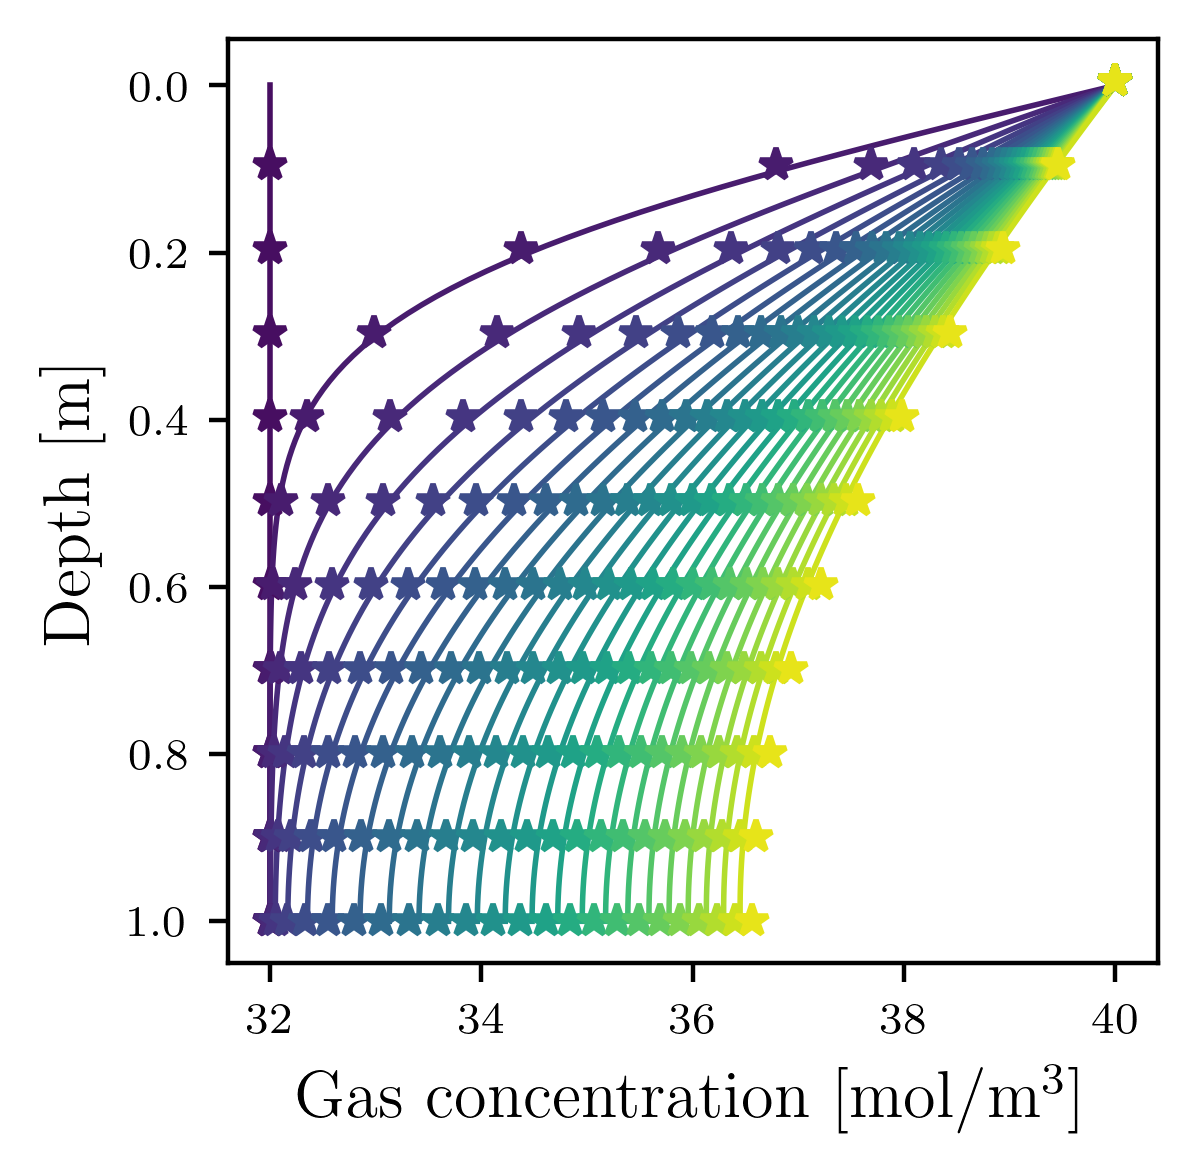

In [10]:
#define a color palette the size of the maximum dataset
palette = sns.color_palette("viridis", max(len(snapshot_times), len(ADSIM_DATA)))

#define plot size
width= 83 * 0.0393701 #in mm to inches
AR= 0.6  # aspect ratio height/width
height= width * AR  # in in

gf.PlotAll(OB_DATA, snapshot_times, 'C', 'Position (m)', palete=palette, legendMode=False, hold=1, xlabel=r'Gas concentration [mol/m$^3$]', ylabel='Depth [m]')

gf.PlotAll(ADSIM_DATA, IDs, 'CO2_Concentration', 'arc_length', palete=palette, legendMode=False, hold=1, xlabel=r'Gas concentration [mol/m$^3$]', ylabel='Depth [m]', mode='*', makersize=5, sample_span=100, linewith=1, xsize=width, ysize=height)

#invert y axis
plt.gca().invert_yaxis()

In [12]:
# Better analytical solution to this problem

# define target function
def eigenvalue_function(beta_m):
 return beta_m* np.cos(beta_m)/ np.sin(beta_m)

In [20]:
def Get_zeroes_beta(n):
    # n is an integer number of zeroes to find
    beta_zeroes = []
    # use Newton-Raphson method to find roots
    from scipy.optimize import newton
    for i in range(n):
        if i == 0:
            guess = 0.0001  # initial guess for the first root near zero
        else:
            guess = i * np.pi  # initial guess near the expected root
        beta_m = newton(eigenvalue_function, guess)
        beta_zeroes.append(beta_m)
    return beta_zeroes

In [43]:
def Axt(x, t, degree, L, D):
    #get first 'degree' eigenvalues
    beta_zeroes = Get_zeroes_beta(degree)
    A_sum = 0
    for beta_m in beta_zeroes:        
        A_m = (2 * beta_m * np.sin(beta_m*x/L)) * np.exp(-beta_m**2 * D * t / L**2)/ beta_m**2
        A_sum += A_m
    A_sum= 1- A_sum
    return A_sum

In [44]:
# Define x points
x_points = np.linspace(0, 1, 100)  # from 0 to 1 m

#final time simulated
t_final = 7200  # seconds
# Diffusion coefficient
D = 6.11e-5   # m^2/s
# Boundary concentration
C0 = 40  # mol/m^3
# Initial concentration
C_i = 32  # mol/m^3

# snapshot times to evaluate
snapshot_times = np.linspace(0, t_final, 24)  # from 0s to 7200s

# Calculate analytical solution at snapshot times
analytical_solutions = {}
for t in snapshot_times:
    analytical_solutions[t] = C_i + (C0 - C_i) * Axt(x_points, t, 10000, 1, D)


# Save data in DataFrame for easier col 1: x_points col 2- : concentrations at different times
data = {'Position (m)': x_points}
OB_DATA=[]
for t in snapshot_times:
    data['C'] = analytical_solutions[t]
    if t == 0: #fill with initial condition
        data['C'] = np.full_like(x_points, C_i)
    df = pd.DataFrame(data)
    OB_DATA.append(df)

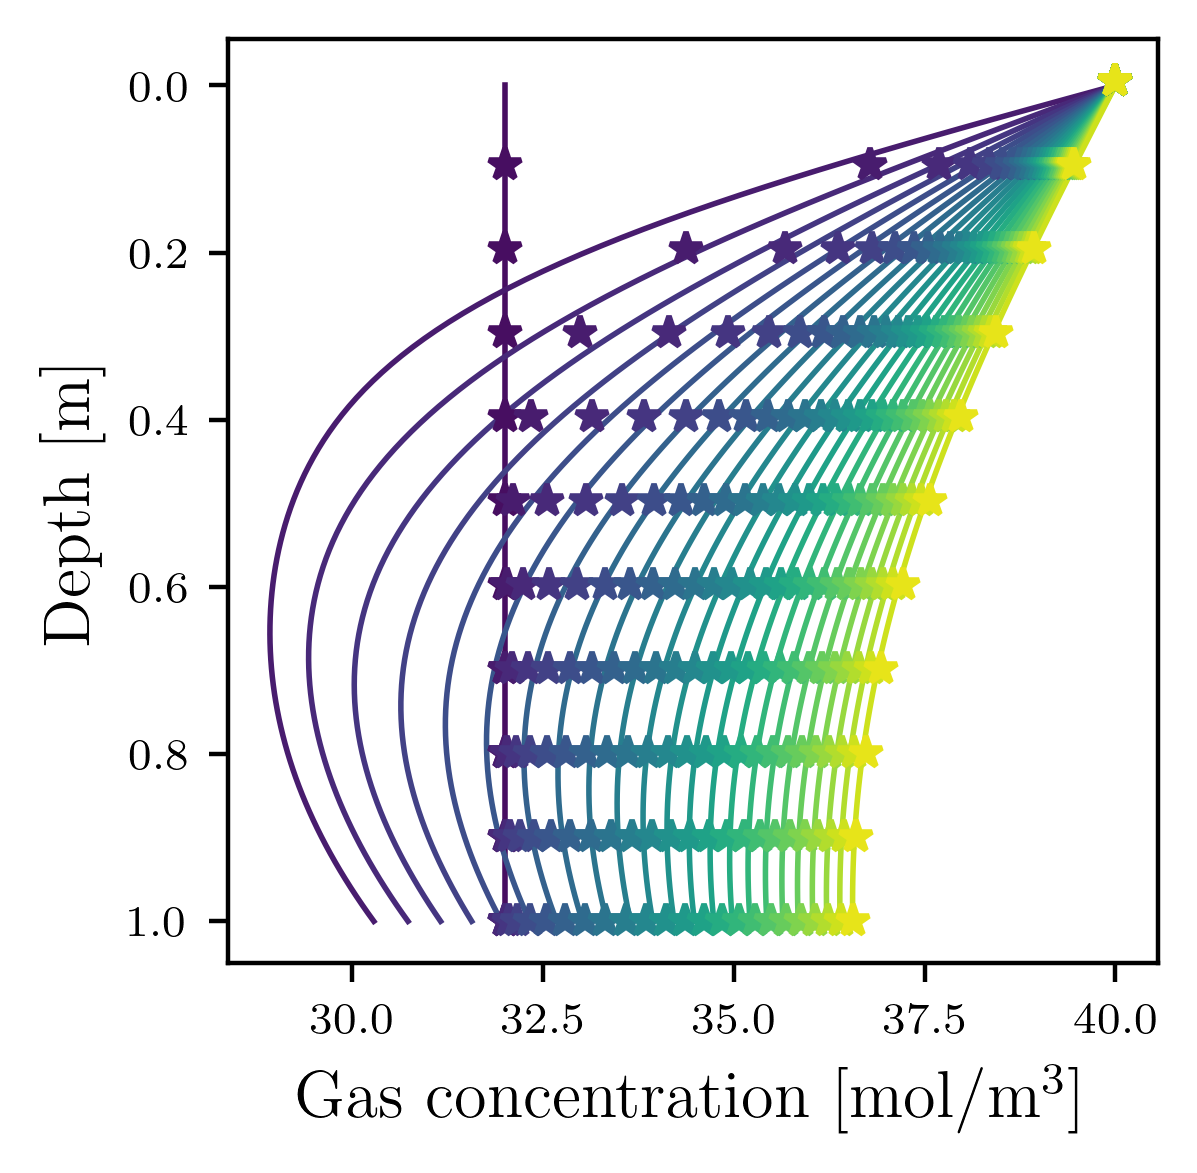

In [45]:
#define a color palette the size of the maximum dataset
palette = sns.color_palette("viridis", max(len(snapshot_times), len(ADSIM_DATA)))

#define plot size
width= 83 * 0.0393701 #in mm to inches
AR= 0.6  # aspect ratio height/width
height= width * AR  # in in

gf.PlotAll(OB_DATA, snapshot_times, 'C', 'Position (m)', palete=palette, legendMode=False, hold=1, xlabel=r'Gas concentration [mol/m$^3$]', ylabel='Depth [m]')

gf.PlotAll(ADSIM_DATA, IDs, 'CO2_Concentration', 'arc_length', palete=palette, legendMode=False, hold=1, xlabel=r'Gas concentration [mol/m$^3$]', ylabel='Depth [m]', mode='*', makersize=5, sample_span=100, linewith=1, xsize=width, ysize=height)

#invert y axis
plt.gca().invert_yaxis()